In [1]:
import tensorflow as tf 
import keras

Using TensorFlow backend.


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as  plt 
import seaborn as sns

In [3]:
RANDOM_SEED = 42

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.2,
                                    shear_range=0.2,
                                    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)                    

In [35]:
train_set = train_datagen.flow_from_directory("dataset/Train",
                                                target_size=(128,128),
                                                batch_size=16,
                                                class_mode='binary')
val_set = val_datagen.flow_from_directory('dataset/Validation',
                                         target_size=(128,128),
                                         batch_size=4,
                                         class_mode='binary' )                                            

Found 10992 images belonging to 2 classes.
Found 799 images belonging to 2 classes.


In [8]:
## CNN Model from stratch Approch
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.callbacks import EarlyStopping,ModelCheckpoint
from livelossplot import PlotLossesKeras

In [9]:
'''model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#model.summary()'''

"model = Sequential()\nmodel.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu',padding='same'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Flatten())\nmodel.add(Dense(512,activation='relu'))\nmodel.add(Dropout(0.4))\nmodel.add(Dense(128,activation='relu'))\nmodel.add(Dense(1,activation='relu'))\nmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])\n#model.summary()"

In [9]:
from keras.applications import VGG16,InceptionV3,ResNet50V2,Xception
from keras.models import Model

In [36]:
#Transfer Learning Approach
model_tr = VGG16(weights='imagenet',
                    pooling=None,
                    include_top=False,
                    input_shape=(128,128,3))
model_tr.trainable=False

In [37]:
input_layer = model_tr.output
x = Flatten()(input_layer)
x = Dense(512,activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(64,activation='relu')(x)
out = Dense(1,activation='sigmoid')(x)
model = Model(inputs=model_tr.input,outputs=out)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
callback = [EarlyStopping(patience=1,
                            monitor='val_accuracy'),
            PlotLossesKeras()]            

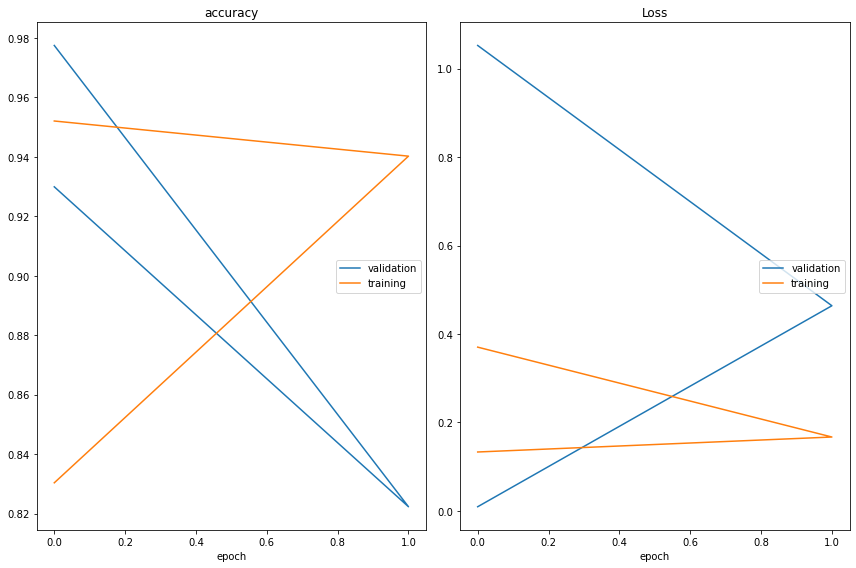

accuracy
	validation       	 (min:    0.822, max:    0.977, cur:    0.977)
	training         	 (min:    0.830, max:    0.952, cur:    0.952)
Loss
	validation       	 (min:    0.009, max:    1.052, cur:    0.009)
	training         	 (min:    0.133, max:    0.370, cur:    0.133)


In [51]:
h = model.fit_generator(train_set,
                        validation_data=val_set,
                        epochs=1,
                        callbacks=callback,
                        steps_per_epoch=int(10992/16),
                        validation_steps=int(800/4))

In [52]:
model.save('Final_Model')

In [53]:
import cv2

[[0.]]


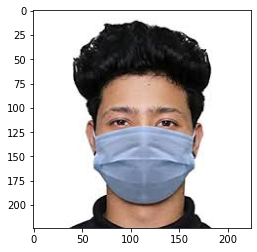

In [56]:
image = cv2.imread('specimens/face_1.jpeg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
image = cv2.resize(image,(128,128))
image = image.reshape(1,128,128,3)

print(np.round(model.predict(image)))

In [57]:
val_set.class_indices

{'WithMask': 0, 'WithoutMask': 1}